1.Reviews Data was extracted from TrustPilot website into Json file using Beautiful Soup,Json and Requests libraires.
2.Required Manipulations and Visalizations done using Pandas.

In [185]:
import pandas as pd

df = pd.read_json(r'C:\Users\VenuMadhav\OneDrive\Tests\data.json')

In [186]:
df.head()

,socialShareUrl,businessUnitId,businessUnitDisplayName,consumerId,consumerName,reviewId,reviewHeader,reviewBody,stars,hasBusinessUnitMergeHistory
0,https://www.trustpilot.com/reviews/5f860030798...,519d7b95000064000536e3d7,MarketFinance,5f8600308bc2c800195a371f,Richard,5f860030798e6f0bcc445efc,My welcome to market finance has been…,My welcome to market finance has been brillia...,5,False
1,https://www.trustpilot.com/reviews/5f858486798...,519d7b95000064000536e3d7,MarketFinance,5f858486cecc5f001e035fc3,Lisa,5f858486798e6f07705ccb97,Very helpful in guiding us through the…,Very helpful in guiding us through the process...,5,False
2,https://www.trustpilot.com/reviews/5f849b66798...,519d7b95000064000536e3d7,MarketFinance,5bdc3ed3cf96d6f0d795d7f4,Jack,5f849b66798e6f07705c0beb,Excellent service,Market finance have provided me excellent serv...,5,False
3,https://www.trustpilot.com/reviews/5f849916798...,519d7b95000064000536e3d7,MarketFinance,5f2d22addbad843eecb1b15f,Stephen Forde,5f849916798e6f07705c08ef,Excellent service,Excellent service,5,False
4,https://www.trustpilot.com/reviews/5f7e08f8798...,519d7b95000064000536e3d7,MarketFinance,5f7e08e808bffd0012e3e045,Austin Saunders,5f7e08f8798e6f06fc58c134,New customer on-boarding,From start to finish the Market Finance team h...,5,False


# Remove columns

In [187]:
df = df.drop(df.columns[[0,1,2,3,4,5,6,7,9]], axis=1)

In [188]:
df.head()

,stars
0,5
1,5
2,5
3,5
4,5


# Add New Column ReviewType based on number of Stars

In [189]:
def reviewtype (row):
   if row['stars'] == 1 :
      return 'Bad'
   if row['stars'] == 2 :
      return 'Poor'
   if row['stars'] == 3 :
      return 'Average'
   if row['stars'] == 4 :
      return 'Great'
   if row['stars'] == 5 :
      return 'Excellent'
   return 'Other'

In [190]:
df['reviewtype'] = df.apply (lambda row: reviewtype(row), axis=1)

In [170]:
df.head()

,stars,reviewtype
0,5,Excellent
1,5,Excellent
2,5,Excellent
3,5,Excellent
4,5,Excellent


# Count by rating

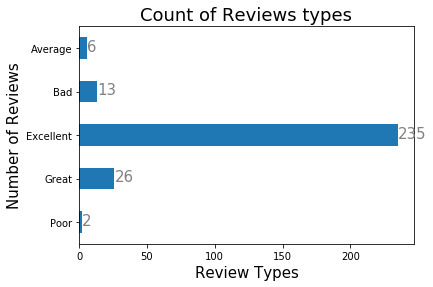

In [207]:
ax = df.groupby(['reviewtype'])['stars'].count().plot(kind = 'barh')
ax.set_title("Count of Reviews types", fontsize=18);
ax.set_ylabel("Number of Reviews", fontsize=15);
ax.set_xlabel("Review Types", fontsize=15);

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='grey');
ax.invert_yaxis()